### Visualize the results of the manual inspection

In [5]:
import matplotlib.pyplot as plt
import json
import os

In [12]:
model_root = os.path.realpath('../../../model_contradictions/')
create_coda_root = os.path.join(model_root, 'create_coda')
annotation_validation = os.path.join(create_coda_root, 'annotation_validation')

graphics_root = os.path.join(model_root, 'graphics')

coda_root = f'/disk/ml/own_datasets/CODA'
json_cornercases = os.path.join(coda_root, 'corner_case.json')

In [13]:
with open(annotation_validation, 'r') as f:
    anno_valid = f.read().splitlines()
    
with open(json_cornercases, 'r') as f:
    data_cornercases = json.load(f)
    
categories = data_cornercases['categories']
annotations = data_cornercases['annotations']

In [7]:
counts_total = [0,0,0,0,0,0,0,0,0]
counts_once = [0,0,0,0,0,0,0,0,0]
counts_kitti = [0,0,0,0,0,0,0,0,0]
counts_nuscenes = [0,0,0,0,0,0,0,0,0]
for index_c, count in enumerate(counts_total):
    for index_a, anno in enumerate(anno_valid):
            
        if f'{index_c + 1}' == anno:
            if index_a <= 4413:
                counts_once[index_c] += 1
            elif index_a >= 4813:
                counts_nuscenes[index_c] += 1
            else:
                counts_kitti[index_c] += 1
            counts_total[index_c] += 1

In [8]:
supercategories = ['pedestrian', 'cyclist', 'vehicle', 'animal', 'traffic_facility', 'obstruction', 'misc']
counts_supercategorie = [[0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0]]
for index_c, count in enumerate(counts_total):
    for index_a, anno in enumerate(anno_valid):
        if f'{index_c + 1}' == anno:
            for annotation in annotations:
                if index_a == annotation['id']:
                    for categorie in categories:
                        if annotation['category_id'] == categorie['id']:
                            for index_sc, sc in enumerate(supercategories):
                                if categorie['supercategory'] == sc:
                                    counts_supercategorie[index_sc][index_c] += 1
                                       

In [9]:
anno_description = [
    'DB-Scan',
    'Meanshift',
    'both',
    'mix',
    'DB-Scan wrong cluster',
    'wrong clustering',
    'wrong annotation',
    'Meanshift wrong Cluster',
    'clustering too fine',
]

titles = ['All Anomalies', 'ONCE Anomalies', 'KITTI Anomalies', 'nuScenes Anomalies']
counts = [counts_total, counts_once, counts_kitti, counts_nuscenes]
labels = [anno_description, anno_description, anno_description, anno_description]

In [10]:
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 3 else ''

def plotgraph_datasets(counts, labels, titles):
    
    fig = plt.figure(figsize=(12, 7), tight_layout=False)
    ax1 = fig.add_subplot(121)
    ax1.pie(counts[0], autopct=my_autopct)
    ax1.legend(labels, bbox_to_anchor=(1.4, 0.8, 0.0, 0.2), loc='right', mode=None, ncol=1, borderaxespad=0)
    ax1.set_title(f'{titles[0]} - {sum(counts[0])}')
    
    ax2 = fig.add_subplot(322)
    ax2.pie(counts[1], autopct=my_autopct)
    ax2.set_title(f'{titles[1]} - {sum(counts[1])}')
                  
    ax3 = fig.add_subplot(324)
    ax3.pie(counts[2], autopct=my_autopct)
    ax3.set_title(f'{titles[2]} - {sum(counts[2])}')
    
    ax4 = fig.add_subplot(326)
    ax4.pie(counts[3], autopct=my_autopct)
    ax4.set_title(f'{titles[3]} - {sum(counts[3])}')
    fig.savefig(os.path.join(graphics_root, f'manual_evaluation_datasets.svg'), format='svg', dpi=1200)
    plt.show()
    plt.close()
    
def plotgraph_supercategories(counts, labels, titles):
    
    fig = plt.figure(figsize=(12, 7), tight_layout=False)
    ax1 = fig.add_subplot(241)
    ax1.pie(counts[0], autopct=my_autopct)
    ax1.legend(labels, bbox_to_anchor=(4.6, -0.95, 0.0, 0.2), loc='right', mode=None, ncol=1, borderaxespad=0)
    ax1.set_title(f'{titles[0]} - {sum(counts[0])}')
    
    ax2 = fig.add_subplot(242)
    ax2.pie(counts[1], autopct=my_autopct)
    ax2.set_title(f'{titles[1]} - {sum(counts[1])}')
                  
    ax3 = fig.add_subplot(243)
    ax3.pie(counts[2], autopct=my_autopct)
    ax3.set_title(f'{titles[2]} - {sum(counts[2])}')
    
    ax4 = fig.add_subplot(244)
    ax4.pie(counts[3], autopct=my_autopct)
    ax4.set_title(f'{titles[3]} - {sum(counts[3])}')
    
    ax5 = fig.add_subplot(245)
    ax5.pie(counts[4], autopct=my_autopct)
    ax5.set_title(f'{titles[4]} - {sum(counts[4])}')
                  
    ax6 = fig.add_subplot(246)
    ax6.pie(counts[5], autopct=my_autopct)
    ax6.set_title(f'{titles[5]} - {sum(counts[5])}')
    
    ax7 = fig.add_subplot(247)
    ax7.pie(counts[6], autopct=my_autopct)
    ax7.set_title(f'{titles[6]} - {sum(counts[6])}')
    
    fig.savefig(os.path.join(graphics_root, f'manual_evaluation_supercategories.svg'), format='svg', dpi=1200)
    plt.show()
    plt.close()
    
    

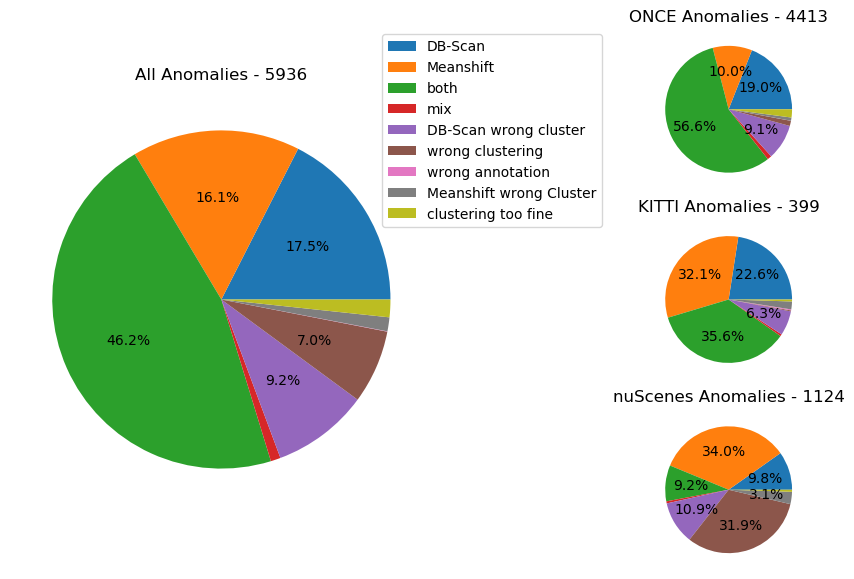

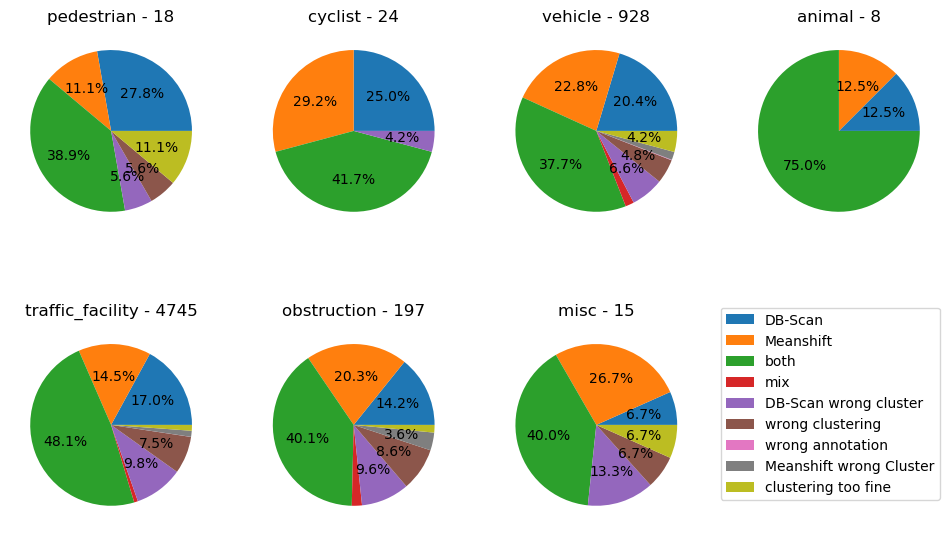

In [11]:
plotgraph_datasets(counts, anno_description, titles)

plotgraph_supercategories(counts_supercategorie, anno_description, supercategories)